# TSM_AppElm Labo02 
## conception d'une antenne patch

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fres = 1.575

In [42]:
class findParam:
    def __init__(self, data,fres, offset=0.001):
        self.data = data
        self.fres = fres
        self.offset = offset

    def findMin(self):
        val = np.min(self.data[:,1])
        index = np.where(val == self.data[:,1])
        return np.squeeze(self.data[index])

    def findBP(self):
        tab = np.where(self.data[:,1] < -10)
        if len(tab[0]) > 0:
            BPmin = self.data[tab[0][0]][0]
            BPmax = self.data[tab[0][len(tab[0])-1]][0]
            return BPmin, BPmax
        return 0, 0 

    def findFreq(self):
        tab = np.where((self.data[:,0] < self.fres+self.offset) & (self.data[:,0] > self.fres-self.offset))
        tab2 = self.data[tab[0]]
        print(tab2)
        return (self.fres,np.mean(tab2[:,1]))

    def __repr__(self):
        vmin = self.findMin()
        fmin, fmax = self.findBP()
        s11F = self.findFreq()
        return "s11 min\t: " + str(vmin) + "\nBP\t: " + str(fmin)+','+str(fmax)+"\n@fr\t: "+str(s11F)

In [43]:
#dataFR4 = pd.read_csv('result_navigator.csv',sep=';')
#dataFR4


[[  1.574      -15.96687378]
 [  1.57599998 -14.92853597]]
[[  1.574      -15.96687378]
 [  1.57599998 -14.92853597]]


s11 min	: [  1.574      -15.96687378]
BP	: 1.567999958992,1.5800000429153
@fr	: (1.575, -15.447704871304001)

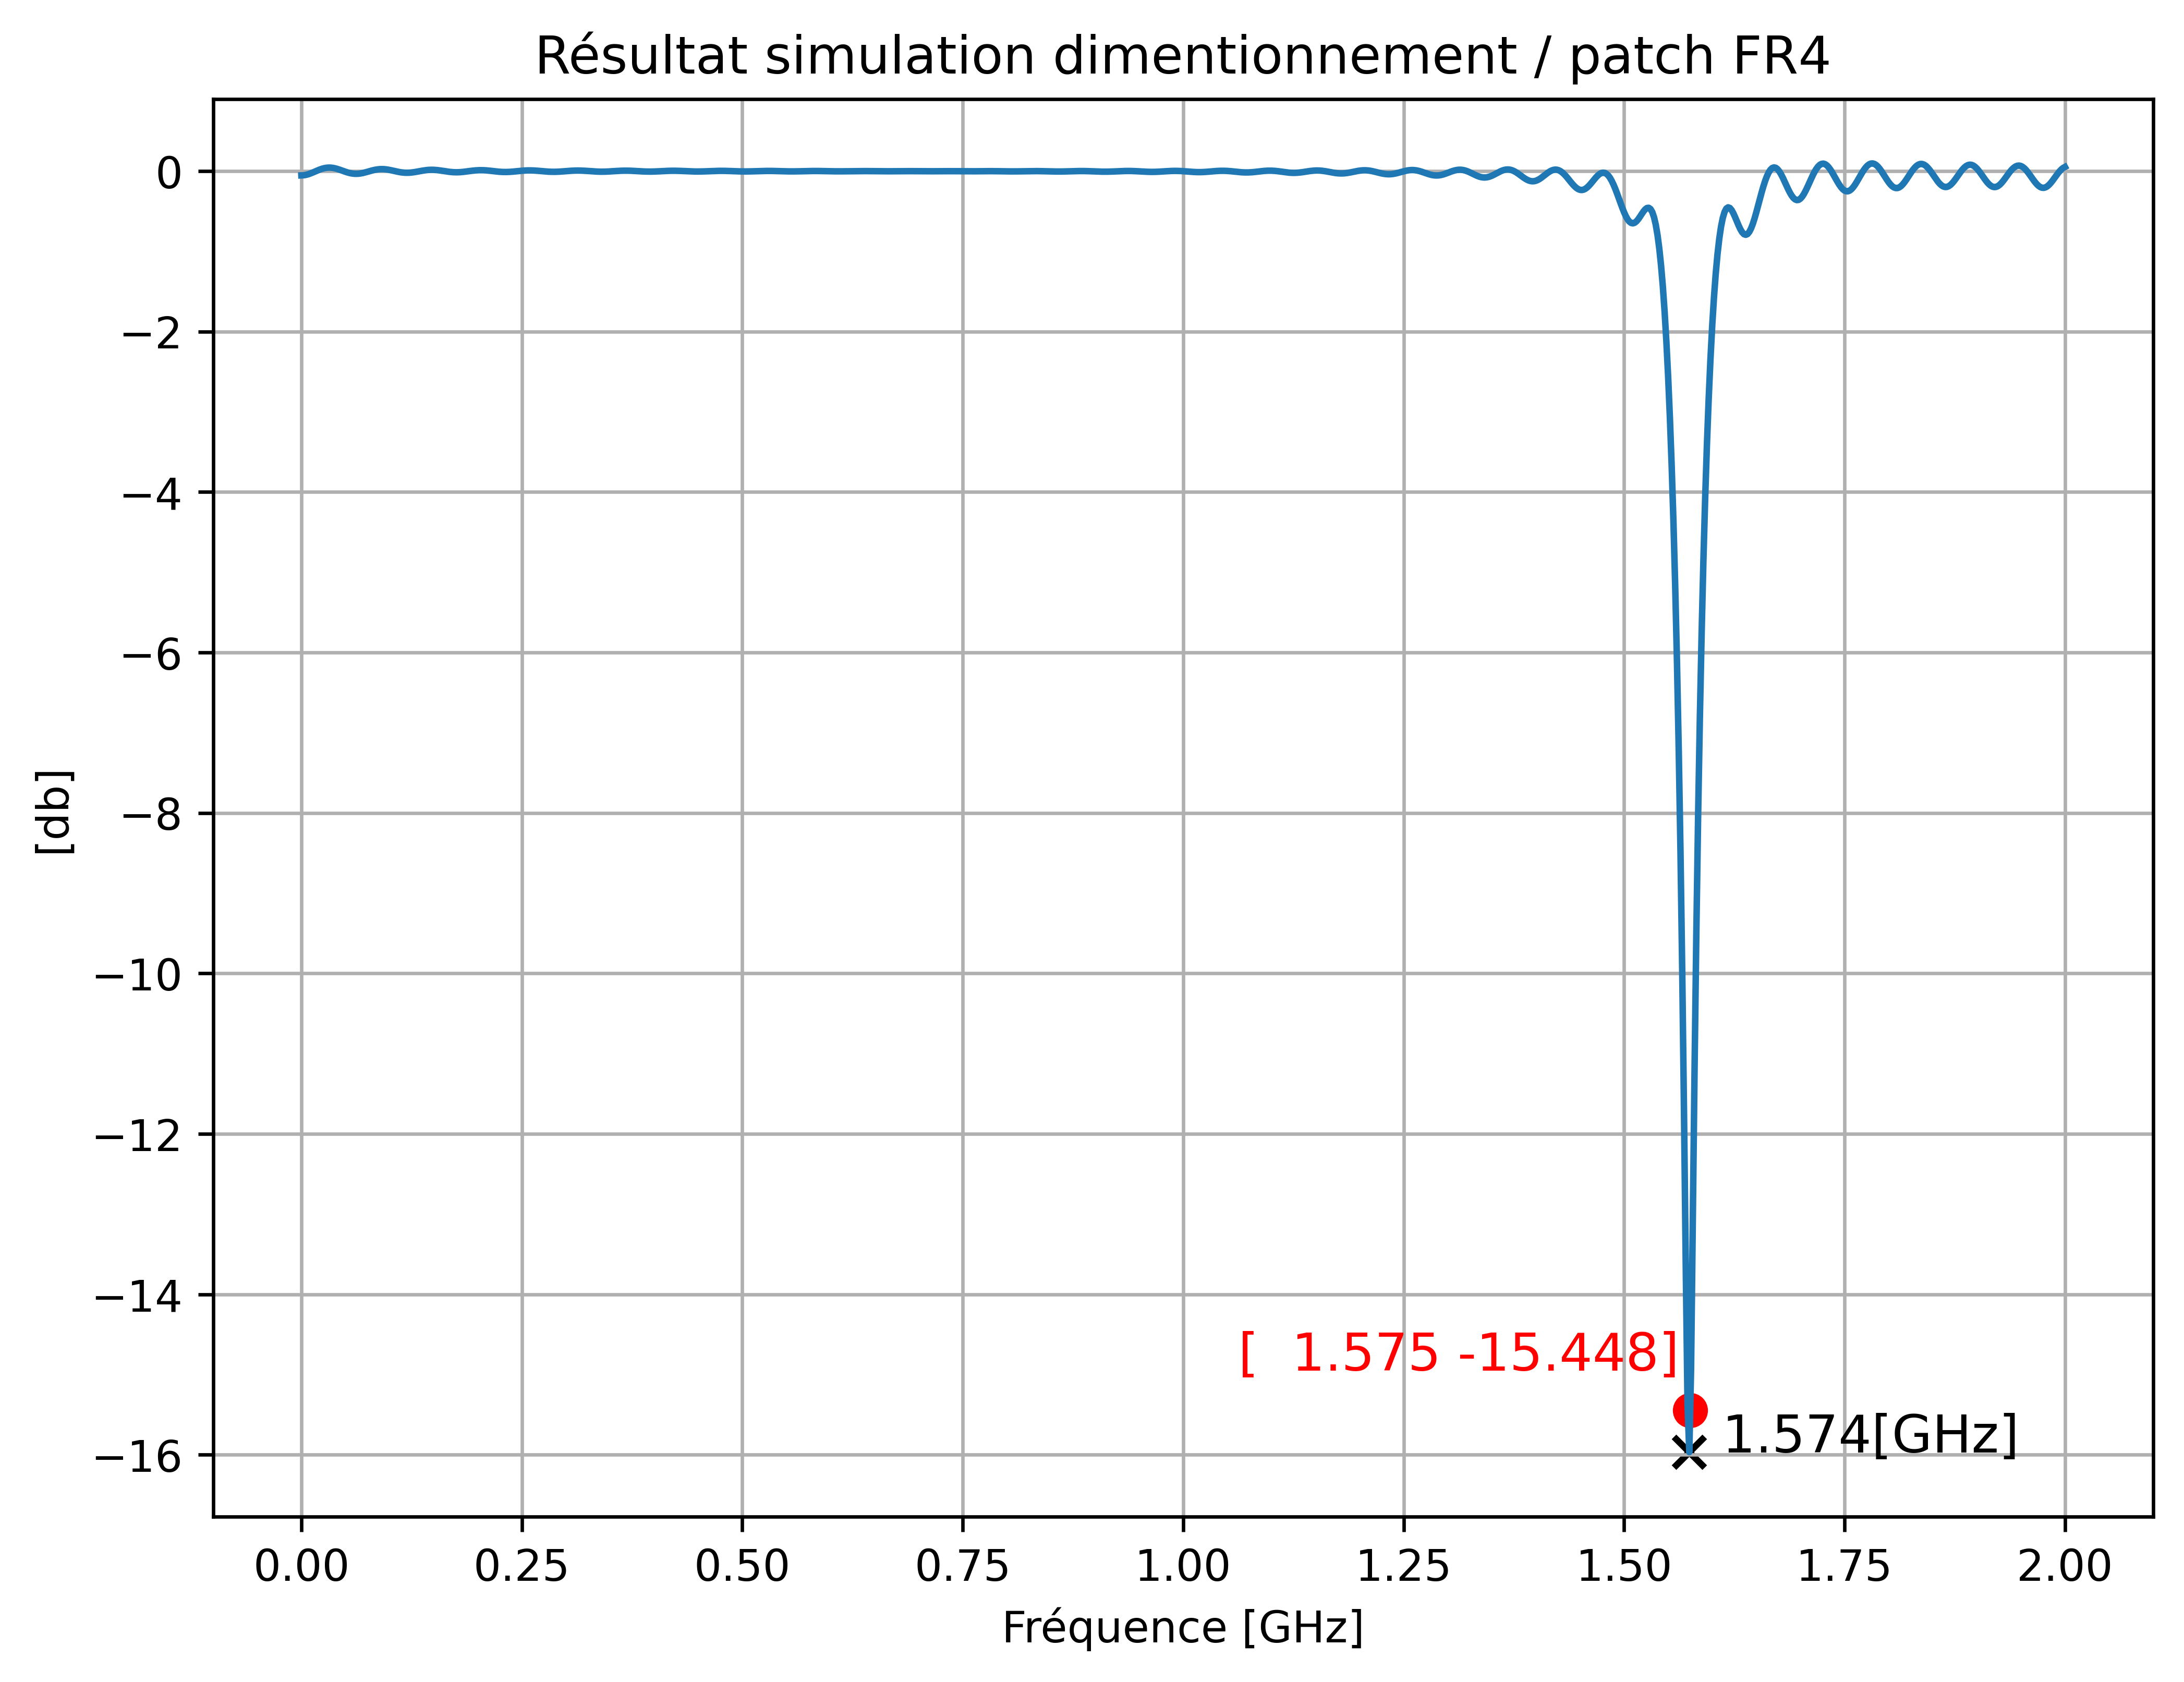

In [44]:
S11_fr4 = np.genfromtxt('patch_fr4_s11_ok.txt',delimiter='\t',skip_header=1)
minval = findParam(S11_fr4, fres).findMin()
resval = findParam(S11_fr4, fres, 0.001).findFreq()

plt.figure(figsize=(8, 6), dpi=600)
plt.plot(S11_fr4[:,0], S11_fr4[:,1])
plt.scatter(*minval,s=50,marker='x',color='k')
plt.text(*minval,"  "+str(np.round(minval[0],3))+"[GHz]",fontsize=12)

plt.scatter(*resval,s=50,marker='o',color='r')
plt.text(resval[0]-0.55,resval[1]+0.5,"  "+str(np.round(resval,3)),fontsize=12,color='r')
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Résultat simulation dimentionnement / patch FR4")
plt.savefig("../Figures/patch/patch_dim_fr4.png")

findParam(S11_fr4, fres, 0.001)

## Partie 2 avec de la ceramique

In [45]:
#dataCER = pd.read_csv('result_navigator_cer_ok.csv',sep=';')
#dataCER

[[  1.574      -20.75057441]
 [  1.57599998 -21.193259  ]]
[[  1.574      -20.75057441]
 [  1.57599998 -21.193259  ]]


s11 min	: [  1.57599998 -21.193259  ]
BP	: 1.5700000524521,1.5800000429153
@fr	: (1.575, -20.971916703366)

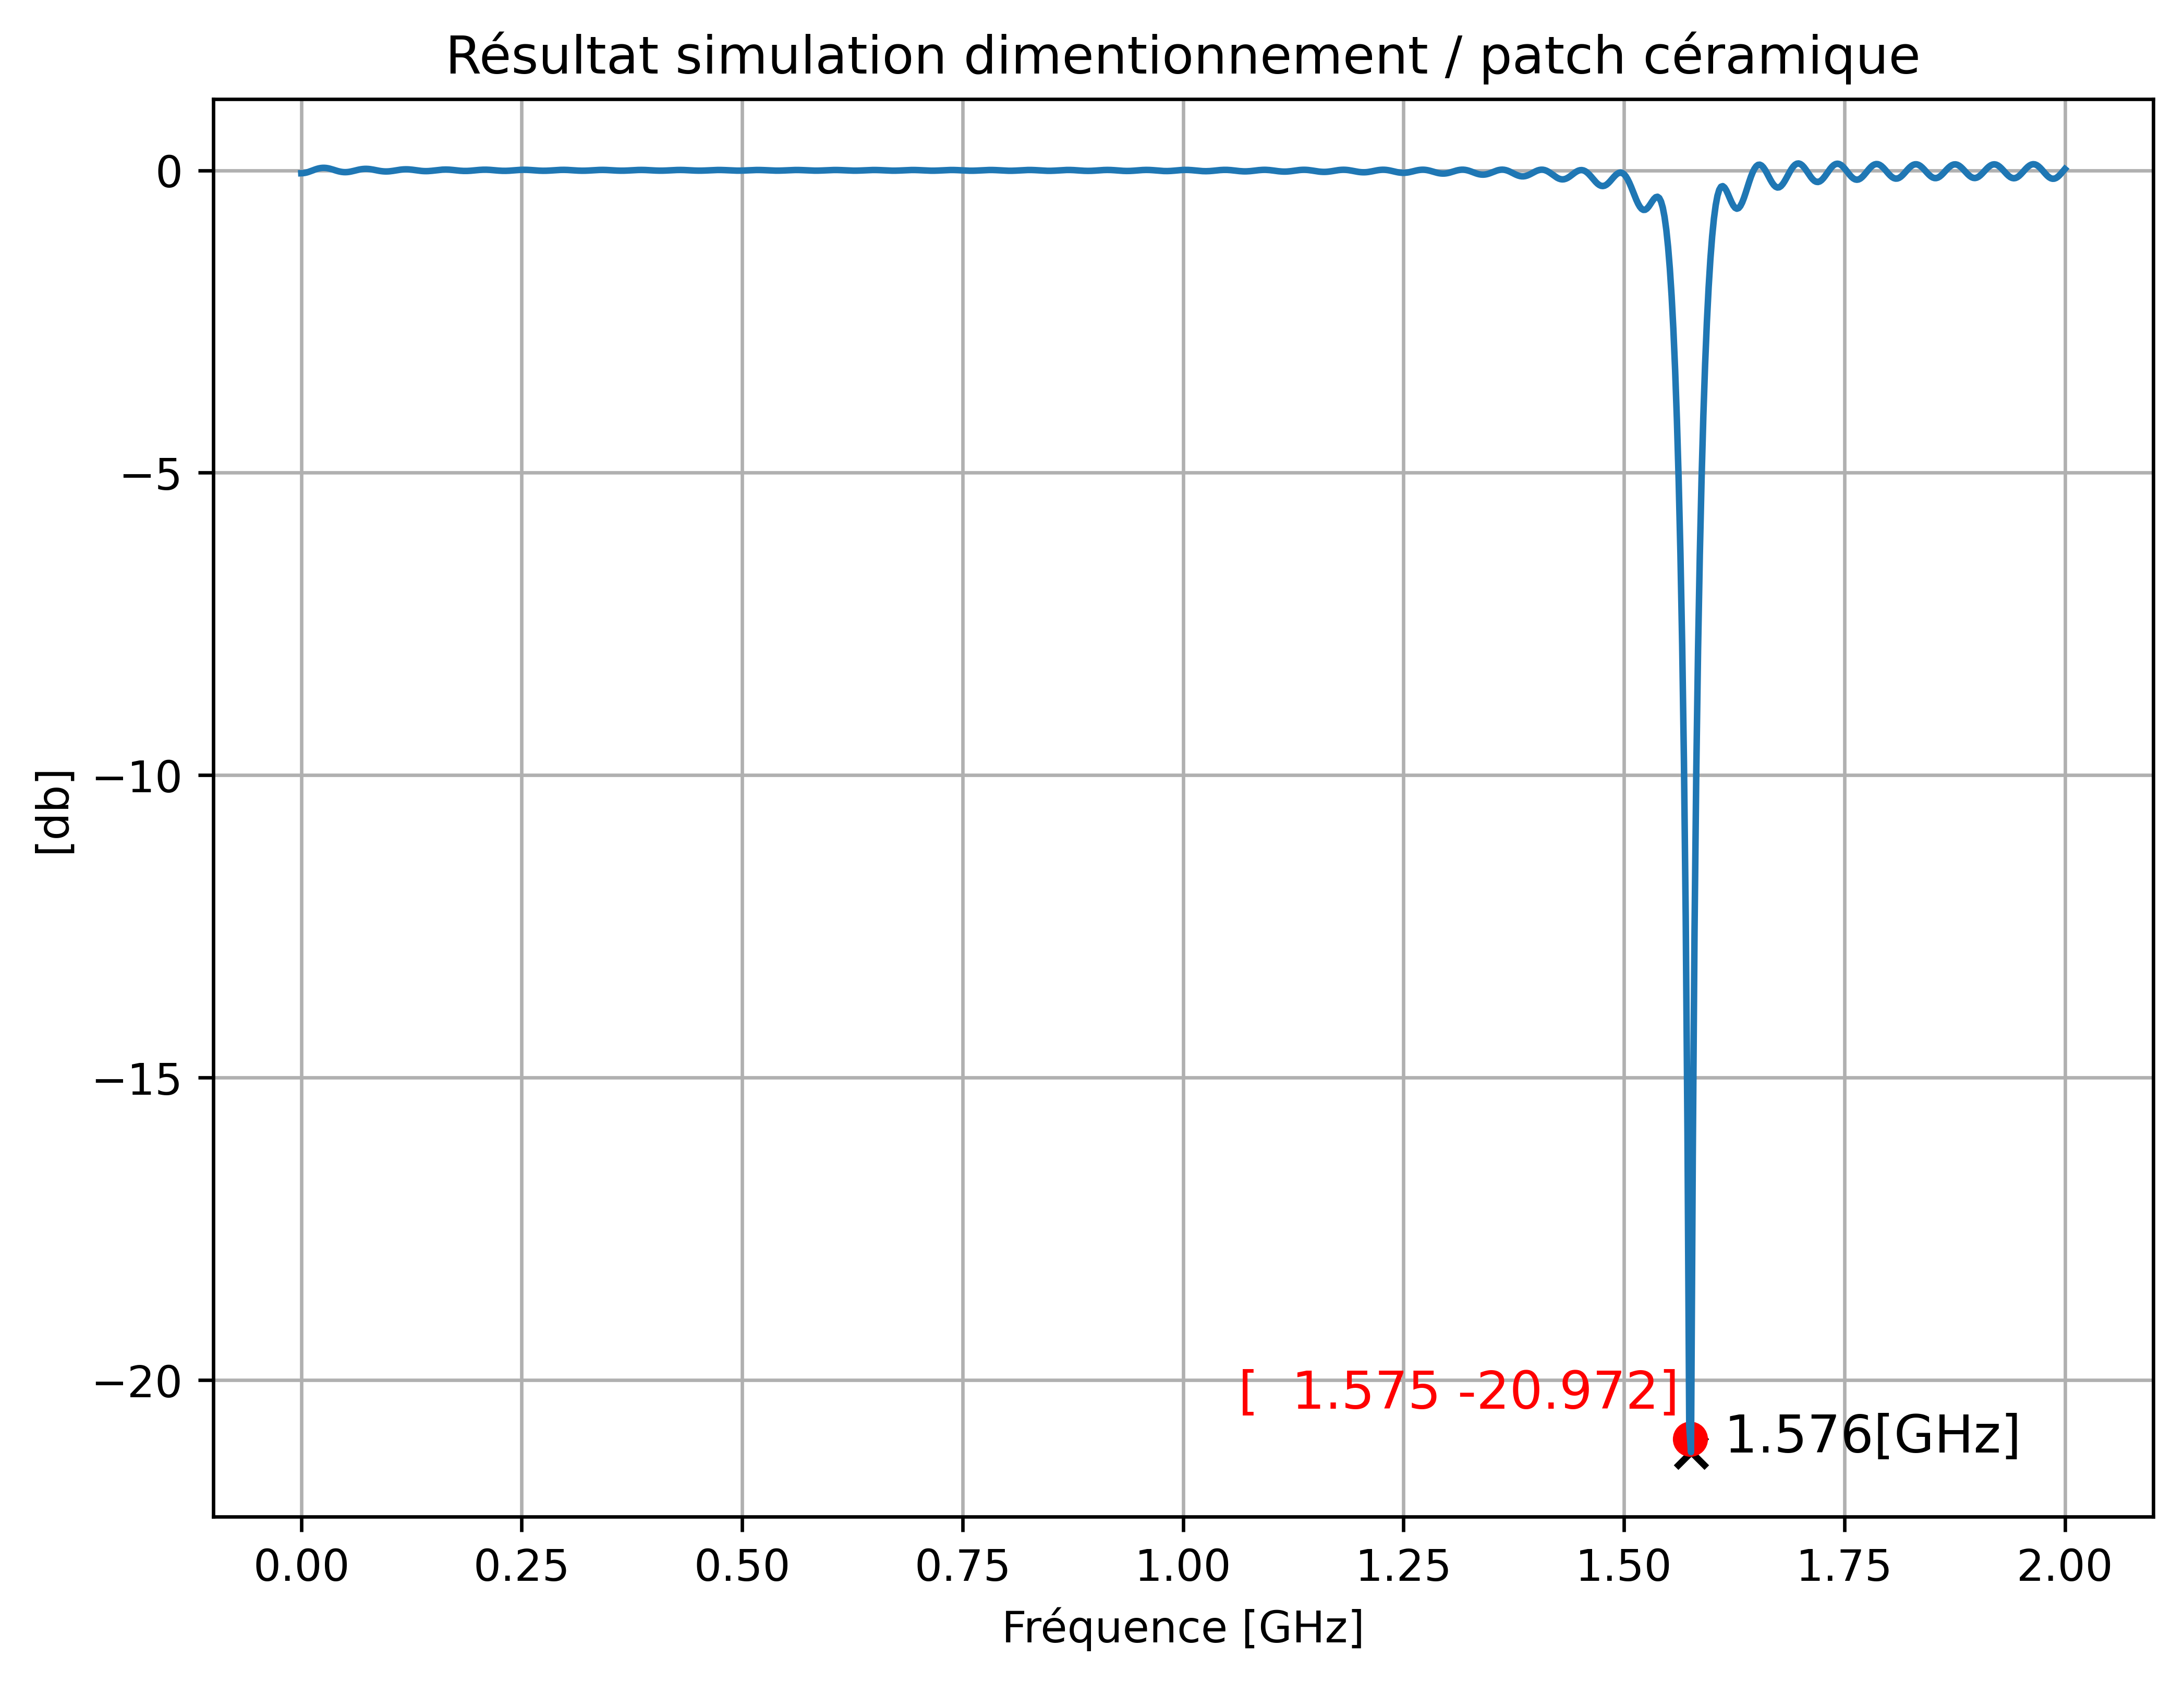

In [46]:
S11_cer = np.genfromtxt('patch_cer_s11_ok.txt',delimiter='\t',skip_header=1)
minval = findParam(S11_cer, fres).findMin()
resval = findParam(S11_cer, fres, 0.001).findFreq()

plt.figure(figsize=(8, 6), dpi=600)
plt.plot(S11_cer[:,0], S11_cer[:,1])
plt.scatter(*minval,s=50,marker='x',color='k')
plt.text(*minval,"  "+str(np.round(minval[0],3))+"[GHz]",fontsize=12)

plt.scatter(*resval,s=50,marker='o',color='r')
plt.text(resval[0]-0.55,resval[1]+0.5,"  "+str(np.round(resval,3)),fontsize=12,color='r')
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Résultat simulation dimentionnement / patch céramique")
plt.savefig("../Figures/patch/patch_dim_cer.png")

findParam(S11_cer,fres,0.001)

## Modification de l'antenne FR4 de 10%

In [47]:
legend = ["original","ws","ls","w","l","w0","w1","y0","y1"]

In [48]:
#S11_m_fr4 = np.zeros((1001,2,6))
#
#plt.figure(figsize=(15, 6), dpi=600)
#for k in range(0,6):
#    filename = 'variationsFR4/modificationsFR4_'+ str(k) +'.txt'
#    S11_m_fr4[:,:,k] = np.genfromtxt(filename,delimiter='\t',skip_header=1)
#    plt.plot(S11_m_fr4[700:850,0,k], S11_m_fr4[700:850,1,k],label=legend[k])
#    print('\n'+legend[k])
#    print(findParam(S11_m_fr4[:,:,k],fres))
#plt.axvline(x = fres, color = 'b', label = '$f_{res}$',linewidth=1) 
#plt.axhline(y = -10, color = 'r', label = '$BP$',linewidth=1) 
#plt.grid()
#plt.xlabel("Fréquence [GHz]")
#plt.ylabel("[db]")
#plt.title("Résultat simulation variation s11 / patch FR4")
#plt.legend()
##plt.savefig("../Figures/patch/patch_var_fr4.png")
#plt.show()



original
[[  1.574      -20.75057597]
 [  1.57599998 -21.1932605 ]]
s11 min	: [  1.57599998 -21.1932605 ]
BP	: 1.5700000524521,1.5800000429153
@fr	: (1.575, -20.9719182384775)

ws
[[  1.574      -29.52813324]
 [  1.57599998 -21.56785936]]
s11 min	: [  1.574      -29.52813324]
BP	: 1.567999958992,1.5800000429153
@fr	: (1.575, -25.5479963012215)

ls
[[  1.574      -26.45711618]
 [  1.57599998 -22.63416887]]
s11 min	: [  1.574      -26.45711618]
BP	: 1.567999958992,1.5800000429153
@fr	: (1.575, -24.545642526444)

w
[[ 1.574      -6.75865446]
 [ 1.57599998 -5.53833703]]
s11 min	: [  1.56400001 -12.342322  ]
BP	: 1.5620000362396,1.567999958992
@fr	: (1.575, -6.1484957456218)

l
[[1.574      0.08568906]
 [1.57599998 0.07532657]]
s11 min	: [  1.44599998 -10.66283636]
BP	: 1.444000005722,1.4479999542236
@fr	: (1.575, 0.0805078131203735)

w0
[[  1.574      -17.74561614]
 [  1.57599998 -19.51595923]]
s11 min	: [  1.57599998 -19.51595923]
BP	: 1.5700000524521,1.5820000171661
@fr	: (1.575, -18.63

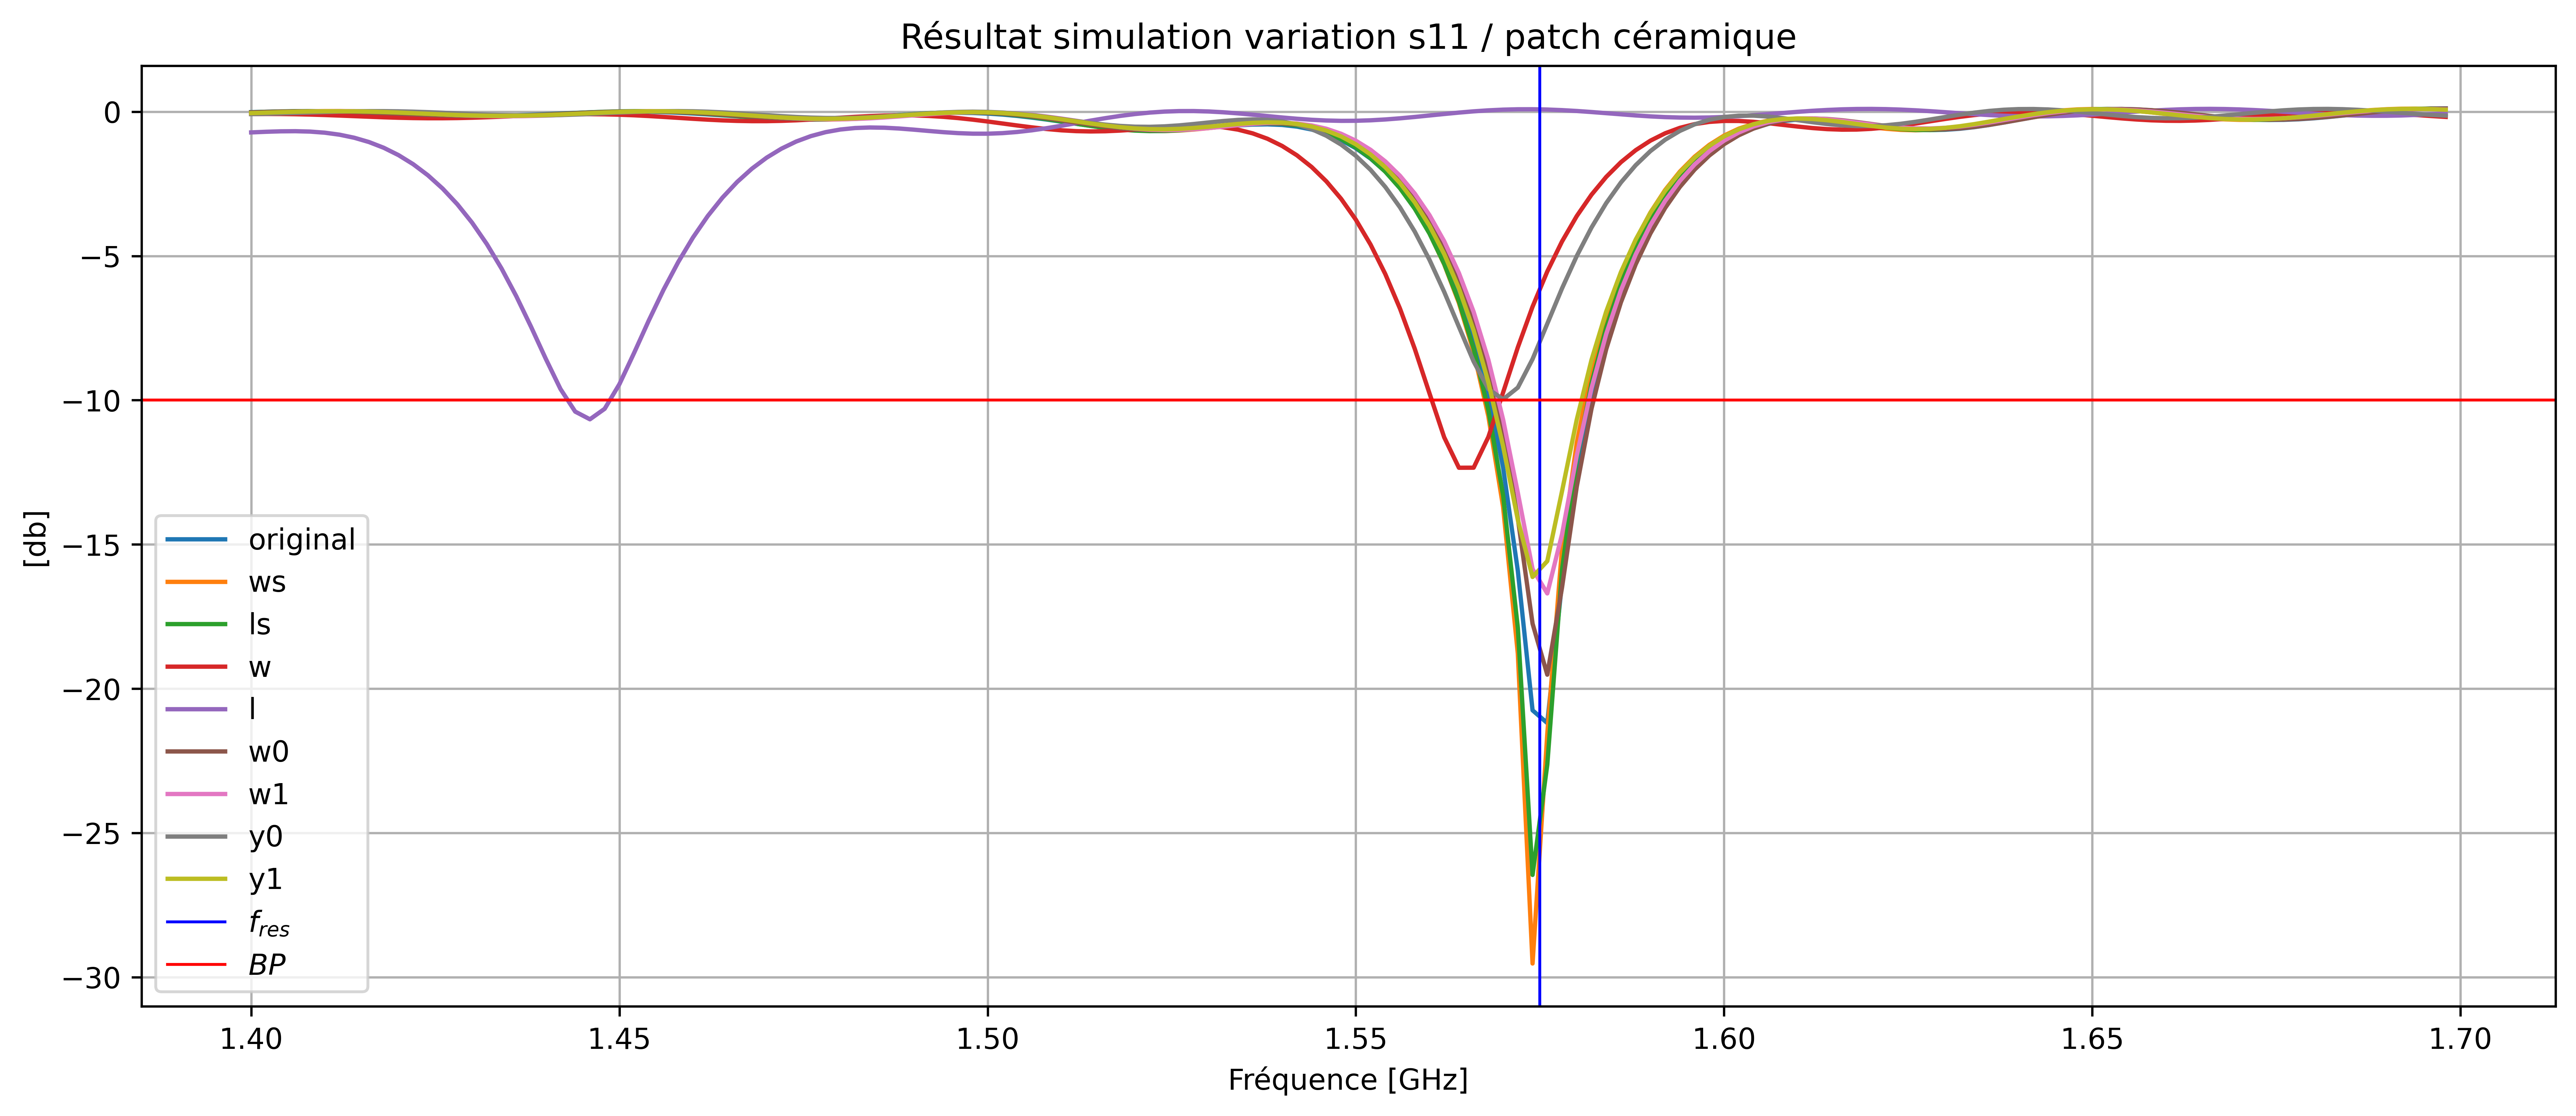

In [49]:
nbVal = 9
S11_m_cer = np.zeros((1001,2,nbVal))

plt.figure(figsize=(15, 6), dpi=600)
for k in range(0,nbVal):
    filename = 'variationsCER/modificationsCER_'+ str(k) +'.txt'
    S11_m_cer[:,:,k] = np.genfromtxt(filename,delimiter='\t',skip_header=1)
    plt.plot(S11_m_cer[700:850,0,k], S11_m_cer[700:850,1,k],label=legend[k])
    print('\n'+legend[k])
    print(findParam(S11_m_cer[:,:,k],fres,0.001))
plt.axvline(x = fres, color = 'b', label = '$f_{res}$',linewidth=1) 
plt.axhline(y = -10, color = 'r', label = '$BP$',linewidth=1) 
plt.grid()
plt.xlabel("Fréquence [GHz]")
plt.ylabel("[db]")
plt.title("Résultat simulation variation s11 / patch céramique")
plt.legend()
plt.savefig("../Figures/patch/patch_var_cer.png")
plt.show()